In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as ts
from tensorflow import keras
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
import numpy as np
from sklearn.model_selection import train_test_split
import cv2

In [2]:
path1=r'D:\Projects\Mask Detection\with_mask'
path2=r'D:\Projects\Mask Detection\without_mask'
dir1=os.listdir(path1)
dir2=os.listdir(path2)

In [3]:
with_mask=[]
without_mask=[]

In [4]:
def get_image_array(path,direc):
    list_img=[]
    for img in direc:
        path_indi=os.path.join(path,img)
        image = load_img(path_indi, target_size=(224, 224))
        image = img_to_array(image)
        image = preprocess_input(image)
        list_img.append(image)
    return list_img

In [5]:
with_mask=get_image_array(path1,dir1)
without_mask=get_image_array(path2,dir2)

In [6]:
with_mask=np.array(with_mask)
with_mask.shape

(690, 224, 224, 3)

In [7]:
without_mask=np.array(without_mask)
without_mask.shape

(686, 224, 224, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


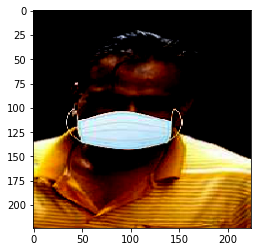

In [8]:
plt.imshow(with_mask[150])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


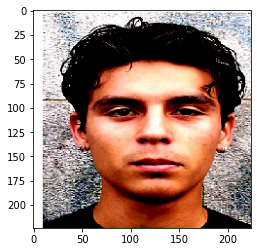

In [9]:
plt.imshow(without_mask[200])

In [10]:
X=np.concatenate([with_mask,without_mask])
X.shape

(1376, 224, 224, 3)

In [11]:
y=np.concatenate([np.ones(len(with_mask)),np.zeros(len(without_mask))])
y.shape
y=y.astype('float32').reshape(-1,1)
y.shape

(1376, 1)

In [12]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [13]:
model=keras.Sequential([
    keras.layers.Conv2D(100,(3,3)),
    keras.layers.MaxPool2D((3,3)),
    
    keras.layers.Conv2D(100,(3,3)),
    keras.layers.MaxPool2D((3,3)),
    
    keras.layers.Flatten(),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1,activation='sigmoid')
])

In [14]:
model

In [15]:
model.compile(optimizer='adam', 
              loss='binary_crossentropy',
              metrics='binary_accuracy')

In [16]:
model.fit(X_train,y_train,epochs=2)

Epoch 1/2
35/35 [==============================] - 65s 2s/step - loss: 0.3738 - binary_accuracy: 0.8645
Epoch 2/2
35/35 [==============================] - 62s 2s/step - loss: 0.1591 - binary_accuracy: 0.9509


In [17]:
model.evaluate(X_test,y_test)

9/9 [==============================] - 5s 503ms/step - loss: 0.1319 - binary_accuracy: 0.9638


[0.13188739120960236, 0.9637681245803833]

In [18]:
y_pred=model.predict(X_test)

In [19]:
y_pred_new=[]
for i in y_pred:
    if(i>=0.5):
        y_pred_new.append(1)
    else:
        y_pred_new.append(0)
y_pred_new

[1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,


In [36]:
model.save('mymod.h5')

In [39]:
def show(ind):
    plt.imshow(X_test[ind])
    print(y_test[ind],y_pred_new[ind])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[1.] 1


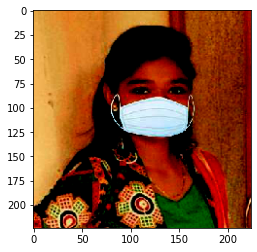

In [50]:
show(43)

In [22]:
image = load_img('images.jfif', target_size=(224, 224))
image = img_to_array(image)
image = preprocess_input(image)
image=np.array(image)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


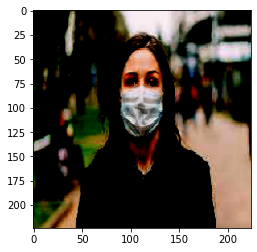

In [23]:
plt.imshow(image)

In [24]:
image = np.expand_dims(image, axis = 0)
image.shape

(1, 224, 224, 3)

In [25]:
model.predict(image)

array([[0.8801671]], dtype=float32)

In [67]:
import cv2
from keras.models import load_model
vid = cv2.VideoCapture(0)
img=image
while(True):
    ret, image = vid.read()
    image=cv2.resize(image, (224, 224))
    image = preprocess_input(image)
    image=np.array(image)
    image1 = np.expand_dims(image, axis = 0)
    img=image
    model=load_model('mymod.h5')
    pred=model.predict(image1)
    print(pred)
    color = (0, 0, 128) if pred>=0.5 else (255, 0, 0)
    start_point = (5, 5)
    end_point = (224, 224)
    cv2.rectangle(image, start_point, end_point, color, 2)
    cv2.imshow('frame', image)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
vid.release()
cv2.destroyAllWindows()

[[0.9138061]]
[[0.88569045]]
[[0.88036394]]
[[0.87509274]]
[[0.8915942]]
[[0.87993085]]
[[0.89481044]]
[[0.8948368]]
[[0.8864225]]
[[0.89635396]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


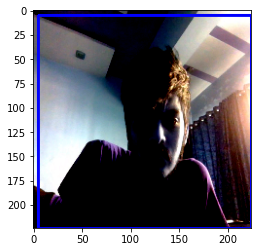

In [68]:
plt.imshow(img)

In [69]:
img = np.expand_dims(img, axis = 0)
pred=model.predict(img)

array([[0.]], dtype=float32)